# Gold Price Predictions

### The goal of the project is to predict gold prices using a suite of factors and linear regression techniques

#### Methodology


1) Data Exploration
2) Feature Engineering
3) Data Cleaning
4) Modelling with Linear Regression methods
5) Model evaluation
6) Selection and conclusion
7) Results



In [19]:
# Import libraries
import pandas as pd
import numpy as np
# import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools # to generate combinations for best subsets
import time # to time some parts of our code
import pickle #to save models
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import *
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import *
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import clone

In [2]:
# Step 1: Read the Excel file without headers
df = pd.read_excel('DBA3803 Project Daily Gold Data.xlsx', header=None)

# Step 2: Create a MultiIndex using the first two rows
multi_index = pd.MultiIndex.from_tuples(list(zip(df.iloc[0], df.iloc[1]))) 
#will refer to this if we need the original column names in bloomberg

new_headers = [col_tuple[0] for col_tuple in multi_index]
new_headers[0] = 'variable_date'
print(new_headers)

# # Step 3: Assign the headers to the DataFrame columns and drop the first two rows
df.columns = new_headers
df = df.drop([0, 1])


# Step 4: Make variable_date the index
df = df.set_index("variable_date")

['variable_date', 'Lead360Gold', 'Lead180Gold', 'Lead30Gold', 'Lead7Gold', 'Lag0Gold', 'Lag1Gold', 'Lag2Gold', 'Lag3Gold', 'Lag4Gold', 'Lag5Gold', 'Lag6Gold', 'Lag7Gold', 'Lag14Gold', 'Lag30Gold', 'Lag60Gold', 'Lag90Gold', 'Lag180Gold', 'Lag360Gold', 'CPIYOY', 'PCEYOY', 'CPICore', 'PCECore', 'Brent', 'WTI', 'Silver', 'CopperIndex', 'Platinum', 'GoldETF', 'GoldETFSharesOutstanding', 'CommodsIndex', 'PreciousMetalsIndex', 'IJC', 'NFP', 'Unrate', 'USRGDPGrowth', 'CCI', 'SPX', 'NDX', 'DJIA', 'Bitcoin', 'CorpSpread', 'BondIndex', 'IGIndex', 'HYIndex', 'Ruble', 'Yuan', 'Yen', 'Aussie', 'Sterling', 'Euro', 'DollarIndex', 'FedBS', 'EFFR', 'Ust3m', 'Ust2y', 'Ust5y', 'Ust10y', 'Ust30y', 'Gold60dVol', 'VIX', 'SMA50', 'SMA200', 'EMA50', 'EMA200', 'RSI14', 'BollU', 'BollM', 'BollL', 'BollW', 'BollPerc', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'DaysSince18Nov04']


In [3]:
df # df looks fine

,Lead360Gold,Lead180Gold,Lead30Gold,Lead7Gold,Lag0Gold,Lag1Gold,Lag2Gold,Lag3Gold,Lag4Gold,Lag5Gold,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,DaysSince18Nov04
variable_date,,,,,,,,,,,,,,,,,,,,,
2004-11-18,466.75,420.0,438.9,451.15,442.0,443.45,439.4,437.6,436.05,436.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2004-11-19,467.5,419.75,438.9,451.0,445.6,442.0,443.45,439.4,437.6,436.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2004-11-20,468.25,420.8,442.45,451.0,445.6,445.6,442.0,443.45,439.4,437.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2004-11-21,475.75,418.0,440.95,451.0,445.6,445.6,445.6,442.0,443.45,439.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
2004-11-22,486.15,418.0,441.0,451.25,447.8,445.6,445.6,445.6,442.0,443.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,NaN,NaN,NaN,NaN,2192.7,2179.8,2176.7,2171.6,2171.6,2171.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7069.0
2024-03-28,NaN,NaN,NaN,NaN,2214.35,2192.7,2179.8,2176.7,2171.6,2171.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7070.0
2024-03-29,NaN,NaN,NaN,NaN,2214.35,2214.35,2192.7,2179.8,2176.7,2171.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7071.0


In [4]:
## Describe Data

# Print the number of rows and columns
print("\nShape of DataFrame (rows, columns):")
print(df.shape)

# Print column names
print("\nColumn Names:")
print(df.columns.tolist())

# Check for columns with null values
null_columns = df.isnull().any()
print("\nColumns with Null Values:", null_columns[null_columns].index.tolist())

# Alternatively, for a more detailed view of null values per column
print("\nNumber of Null Values per Column:\n", df.isnull().sum())

# Earliest Dated data and Latest Dated data
print("\nEarliest dated and latest dated data: ")
print(df.iloc[0][0])
print(df.iloc[-1][0])


Shape of DataFrame (rows, columns):
(7074, 82)

Column Names:
['Lead360Gold', 'Lead180Gold', 'Lead30Gold', 'Lead7Gold', 'Lag0Gold', 'Lag1Gold', 'Lag2Gold', 'Lag3Gold', 'Lag4Gold', 'Lag5Gold', 'Lag6Gold', 'Lag7Gold', 'Lag14Gold', 'Lag30Gold', 'Lag60Gold', 'Lag90Gold', 'Lag180Gold', 'Lag360Gold', 'CPIYOY', 'PCEYOY', 'CPICore', 'PCECore', 'Brent', 'WTI', 'Silver', 'CopperIndex', 'Platinum', 'GoldETF', 'GoldETFSharesOutstanding', 'CommodsIndex', 'PreciousMetalsIndex', 'IJC', 'NFP', 'Unrate', 'USRGDPGrowth', 'CCI', 'SPX', 'NDX', 'DJIA', 'Bitcoin', 'CorpSpread', 'BondIndex', 'IGIndex', 'HYIndex', 'Ruble', 'Yuan', 'Yen', 'Aussie', 'Sterling', 'Euro', 'DollarIndex', 'FedBS', 'EFFR', 'Ust3m', 'Ust2y', 'Ust5y', 'Ust10y', 'Ust30y', 'Gold60dVol', 'VIX', 'SMA50', 'SMA200', 'EMA50', 'EMA200', 'RSI14', 'BollU', 'BollM', 'BollL', 'BollW', 'BollPerc', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'DaysSince18Nov04']

Columns with Null Values: ['Lead360Gold', 'Lead180Gold

In [5]:
# Shift this to a later cell 

# ## Clean the data
# # Check for null values in each column
# null_values = df.isnull().sum()

# # Filter out columns that have at least one null value to check
# columns_with_nulls = null_values[null_values > 0]
# print(columns_with_nulls)  # Verified that only the lead variable has null values, no issues with the df


# # Prepare the dataset for predicting lead7gold
# df_lead7 = df.drop(['Lead360Gold', 'Lead180Gold', 'Lead30Gold'], axis=1).dropna()
# print(df_lead7)


# # Prepare the dataset for predicting lead7gold
# df_lead30 = df.drop(['Lead360Gold', 'Lead180Gold', 'Lead7Gold'], axis=1).dropna()
# print(df_lead30)


# # Prepare the dataset for predicting lead7gold
# df_lead180 = df.drop(['Lead360Gold', 'Lead30Gold', 'Lead7Gold'], axis=1).dropna()
# print(df_lead180)


# # Prepare the dataset for predicting lead7gold
# df_lead360 = df.drop(['Lead180Gold', 'Lead30Gold', 'Lead7Gold'], axis=1).dropna()
# print(df_lead360)



# # The end dates for all of the datasets are correct, can proceed with the code

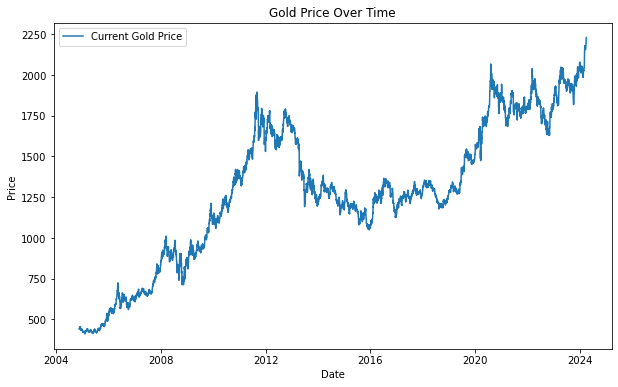

In [6]:
## Plot Gold Price overtime
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Lag0Gold'], label='Current Gold Price')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
# Not adding in square and cube terms for now

# Any Feature Engineering
## Adding new columns (cubed and squared)

# # Columns which do not require squaring or cubing
# non_exp_cols = ['variable_date','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Lead7Gold', 'Lead30Gold','Lead180Gold','Lead360Gold' ]

# # Create a dictionary for storing squared and cubed values
# new_cols_dict = {}

# # Iterate over each column in the DataFrame
# for col in df.columns:
#     # Only timestamped and encoded columns do not need to be squared
#     if col not in non_exp_cols:
#         # Convert the column to float and ignore if it fails
#         df[col] = pd.to_numeric(df[col], errors='coerce')
        
#         # Check if the column has been successfully converted to float
#         if df[col].dtype == 'float64':
#             # Store squared and cubed values in the dictionary
#             new_cols_dict[f'{col}_squared'] = df[col] ** 2
#             new_cols_dict[f'{col}_cubed'] = df[col] ** 3

            
# # Create a new DataFrame from the dictionary of new columns
# new_cols_df = pd.DataFrame(new_cols_dict)

# # Concatenate the new columns DataFrame with the original DataFrame
# df = pd.concat([df, new_cols_df], axis=1)

# # Display the DataFrame to see the new columns
# print(df.columns)
# print(df.shape)


## Preparing the evaluation dataset and the training/fitting set

In [8]:
# Take the latest 20% of data

# Calculate the starting index for the last 20% of the data
start_index = int(len(df) * 0.8)

# Create the eval DataFrame with the last 20%
eval_df = df.iloc[start_index:]

# Display the eval DataFrame
print(eval_df.shape)
print(eval_df.head())
print(eval_df.tail())

(1415, 82)
              Lead360Gold Lead180Gold Lead30Gold Lead7Gold Lag0Gold Lag1Gold  \
variable_date                                                                  
2020-05-17         1830.7      1890.9    1719.85   1733.55  1735.35  1735.35   
2020-05-18         1821.8      1890.9    1724.35   1733.55   1734.7  1735.35   
2020-05-19         1838.1      1890.9     1719.5   1720.25  1737.95   1734.7   
2020-05-20         1838.1      1885.6    1734.75    1694.6   1748.3  1737.95   
2020-05-21         1838.1     1889.05    1734.75   1717.35   1724.9   1748.3   

              Lag2Gold Lag3Gold Lag4Gold Lag5Gold  ...  Apr  May  Jun  Jul  \
variable_date                                      ...                       
2020-05-17     1735.35   1731.6   1708.4   1702.4  ...  0.0  1.0  0.0  0.0   
2020-05-18     1735.35  1735.35   1731.6   1708.4  ...  0.0  1.0  0.0  0.0   
2020-05-19     1735.35  1735.35  1735.35   1731.6  ...  0.0  1.0  0.0  0.0   
2020-05-20      1734.7  1735.35  1735.

In [9]:
# Create train set with first 80%
train_df = df.iloc[:start_index] 
print(train_df.shape)
print(train_df.head())
print(train_df.tail())

(5659, 82)
              Lead360Gold Lead180Gold Lead30Gold Lead7Gold Lag0Gold Lag1Gold  \
variable_date                                                                  
2004-11-18         466.75       420.0      438.9    451.15    442.0   443.45   
2004-11-19          467.5      419.75      438.9     451.0    445.6    442.0   
2004-11-20         468.25       420.8     442.45     451.0    445.6    445.6   
2004-11-21         475.75       418.0     440.95     451.0    445.6    445.6   
2004-11-22         486.15       418.0      441.0    451.25    447.8    445.6   

              Lag2Gold Lag3Gold Lag4Gold Lag5Gold  ...  Apr  May  Jun  Jul  \
variable_date                                      ...                       
2004-11-18       439.4    437.6   436.05   436.05  ...  0.0  0.0  0.0  0.0   
2004-11-19      443.45    439.4    437.6   436.05  ...  0.0  0.0  0.0  0.0   
2004-11-20       442.0   443.45    439.4    437.6  ...  0.0  0.0  0.0  0.0   
2004-11-21       445.6    442.0   443.

## Regression Models

- Standard Model

- Stepwise Feature Selection (Forward Propogation, Backward Propogation)

- Elastic Net Regression

In [10]:
# # Data Preparation
y_lead7 = train_df.Lead7Gold
y_lead30 = train_df.Lead30Gold
y_lead180 = train_df.Lead180Gold
y_lead360 = train_df.Lead360Gold
to_drop = ['Lead7Gold', 'Lead30Gold','Lead180Gold','Lead360Gold']
train_X = train_df.drop(to_drop, axis = 1)

# Standardize 
ss = StandardScaler()
train_X_scaled = ss.fit_transform(train_X)
train_X_scaled = pd.DataFrame(train_X_scaled, columns=train_X.columns, index=train_df.index)

## Evaluation Data Prep
# y data
eval_y_lead7 = eval_df.Lead7Gold.dropna()
eval_y_lead30 = eval_df.Lead30Gold.dropna()
eval_y_lead180 = eval_df.Lead180Gold.dropna()
eval_y_lead360 = eval_df.Lead360Gold.dropna()

# X data
eval_X = eval_df.drop(to_drop, axis = 1)
eval_X_scaled = ss.fit_transform(eval_X)
eval_X_scaled = pd.DataFrame(eval_X_scaled, columns=eval_X.columns, index=eval_X.index).dropna()

eval_X_scaled_lead7 = eval_X_scaled.iloc[:-7]
eval_X_scaled_lead30 = eval_X_scaled.iloc[:-30]
eval_X_scaled_lead180 = eval_X_scaled.iloc[:-180]
eval_X_scaled_lead360 = eval_X_scaled.iloc[:-360]


# # Split into test/train (## Actually may not need to split X into 4, is the same X)
X_train_lead7, X_test_lead7, y_train_lead7, y_test_lead7 = train_test_split(train_X_scaled, y_lead7, test_size = 0.20, random_state = 0)
X_train_lead30, X_test_lead30, y_train_lead30, y_test_lead30 = train_test_split(train_X_scaled, y_lead30, test_size = 0.20, random_state = 0)
X_train_lead180, X_test_lead180, y_train_lead180, y_test_lead180 = train_test_split(train_X_scaled, y_lead180, test_size = 0.20, random_state = 0)
X_train_lead360, X_test_lead360, y_train_lead360, y_test_lead360 = train_test_split(train_X_scaled, y_lead360, test_size = 0.20, random_state = 0)


# Helper Functions
- First function trains model on all the training data (in the datasets dictionary later on) after specifying model name
- Second function shows the most important features of the model
- Third function generates the predictions for the evaluation set, as well as performance statistics for it

### We have 4 output variables which we would like to predict:
- Lead 7 (days)
- Lead 30
- Lead 180
- Lead 360 
gold data. For each, we will run model fitting and determine suitability.

In [11]:
y_train_lead7

variable_date
2015-07-07     1157.4
2018-02-13    1339.85
2014-03-13     1327.0
2011-05-28     1540.0
2007-10-21     779.15
               ...   
2018-05-20     1303.5
2013-10-26    1306.75
2009-05-29      962.0
2012-01-08     1635.5
2012-05-12     1589.5
Name: Lead7Gold, Length: 4527, dtype: object

In [12]:
y_train_lead30

variable_date
2015-07-07    1089.75
2018-02-13    1318.75
2014-03-13     1318.0
2011-05-28     1498.0
2007-10-21      795.5
               ...   
2018-05-20    1276.15
2013-10-26     1243.0
2009-05-29      942.0
2012-01-08     1724.0
2012-05-12     1584.0
Name: Lead30Gold, Length: 4527, dtype: object

In [20]:
# Initialize a dictionary to store training data: the train_models_on_all_data() function will make use of this dictionary to 
# run the model and predict our 4 target variables 
datasets = {
    'lead7': (X_train_lead7, X_test_lead7, y_train_lead7, y_test_lead7),
    'lead30': (X_train_lead30, X_test_lead30, y_train_lead30, y_test_lead30),
    'lead180': (X_train_lead180, X_test_lead180, y_train_lead180, y_test_lead180),
    'lead360': (X_train_lead360, X_test_lead360, y_train_lead360, y_test_lead360)
}


def train_models_on_all_data(dataset_object, model_algorithm, model_algorithm_name):
  model_results = {
      "algorithm_name": model_algorithm_name
  }
  for lead_time, (X_train, X_test, y_train, y_test) in dataset_object.items():
    print(f"Fitting {model_algorithm_name} model for: {lead_time}")

    # Clone the model to ensure a new instance for each dataset
    model = clone(model_algorithm)

    # Fit the model on the train data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate the number of observations and predictors
    n = X_train.shape[0]  # number of observations
    p = X_train.shape[1]  # number of predictors

    # Calculate adjusted R-squared
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    # Store results
    model_results[lead_time] = {'MSE': mse, 'R^2': r2, 'Adjusted R^2': adjusted_r2}
    model_results[model_algorithm_name + '_' + lead_time] = model
    
    # Print results for this dataset
    print(f"{model_algorithm_name} Results for {lead_time} - MSE: {mse}, R^2: {r2}, Adjusted R^2: {adjusted_r2}\n")

  return model_results

In [21]:
# This function plots the most important features of the model

def show_feature_impt_plot(model, X_train, model_name, top_K_features):
  # Get coefficients and sort them by their absolute values, but preserve signs
    coefficients = model.coef_
    
    # Sort indices by the absolute values of the coefficients, preserving the sign
    sorted_indices = np.argsort(np.abs(coefficients))[::-1][:top_K_features]  # Top top_K_features indices sorted by absolute value

    # Extracting top top_K_features feature names and their corresponding coefficients
    top_features = X_train.columns[sorted_indices]
    top_coefficients = coefficients[sorted_indices]

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.barh(range(top_K_features), top_coefficients[::-1], align='center')  # Reverse order to have the largest at the top
    plt.yticks(range(top_K_features), top_features[::-1])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Top {top_K_features} Feature Importances for {model_name}')
    plt.show()

    return top_features

In [22]:
# Initialize a dictionary to store eval set data: the final_pred() function will make predictions for the eval set

final_dataset = {
  'lead7' : (eval_X_scaled, eval_y_lead7),
  'lead30' : (eval_X_scaled, eval_y_lead30),
  'lead180' : (eval_X_scaled, eval_y_lead180),
  'lead360' : (eval_X_scaled, eval_y_lead360),
}

def final_pred(dataset, target_model):
  X_final = dataset[0]
  y_test = dataset[1]
  y_pred = target_model.predict(X_final)

  # Calculate metrics
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  
  # Calculate the number of observations and predictors
  n = X_final.shape[0]  # number of observations
  p = X_final.shape[1]  # number of predictors

  # Calculate adjusted R-squared
  adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
  
  # Store results
  return {'MSE': mse, 'R^2': r2, 'Adjusted R^2': adjusted_r2, 'y_predictions' : y_pred}


### Model 1: Standard Regression with No Regularisation

Step 1: Train the model 

In [23]:
standard_model_results = train_models_on_all_data(datasets, LinearRegression(), "standard_linear_reg")

Fitting standard_linear_reg model for: lead7
standard_linear_reg Results for lead7 - MSE: 657.4891044508132, R^2: 0.9947085330121577, Adjusted R^2: 0.9946157419993313

Fitting standard_linear_reg model for: lead30
standard_linear_reg Results for lead30 - MSE: 1793.0628449659475, R^2: 0.9856976174930151, Adjusted R^2: 0.9854468113249519

Fitting standard_linear_reg model for: lead180
standard_linear_reg Results for lead180 - MSE: 3038.3597002307038, R^2: 0.975553610595404, Adjusted R^2: 0.9751249194142982

Fitting standard_linear_reg model for: lead360
standard_linear_reg Results for lead360 - MSE: 3848.132728794996, R^2: 0.9665338349559407, Adjusted R^2: 0.9659469732487832



In [24]:
standard_model_results['standard_linear_reg_lead7']

LinearRegression()

Step 2: Show the most important features for each of the models

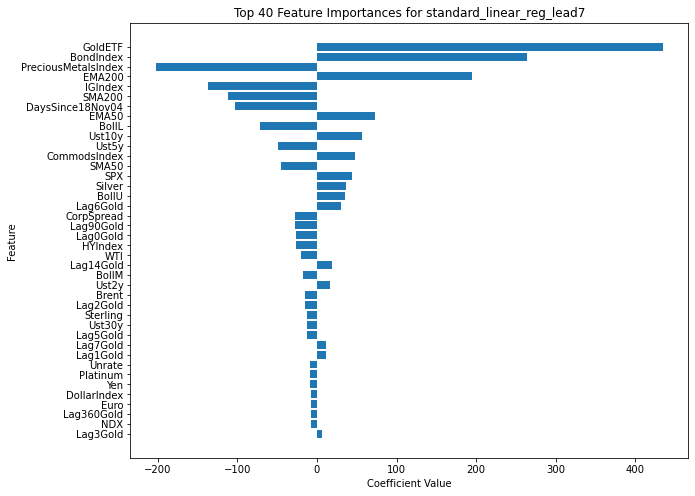

Index(['GoldETF', 'BondIndex', 'PreciousMetalsIndex', 'EMA200', 'IGIndex',
       'SMA200', 'DaysSince18Nov04', 'EMA50', 'BollL', 'Ust10y', 'Ust5y',
       'CommodsIndex', 'SMA50', 'SPX', 'Silver', 'BollU', 'Lag6Gold',
       'CorpSpread', 'Lag90Gold', 'Lag0Gold', 'HYIndex', 'WTI', 'Lag14Gold',
       'BollM', 'Ust2y', 'Brent', 'Lag2Gold', 'Sterling', 'Ust30y', 'Lag5Gold',
       'Lag7Gold', 'Lag1Gold', 'Unrate', 'Platinum', 'Yen', 'DollarIndex',
       'Euro', 'Lag360Gold', 'NDX', 'Lag3Gold'],
      dtype='object')

In [25]:
show_feature_impt_plot(standard_model_results['standard_linear_reg_lead7'],X_train_lead7, "standard_linear_reg_lead7", 40)

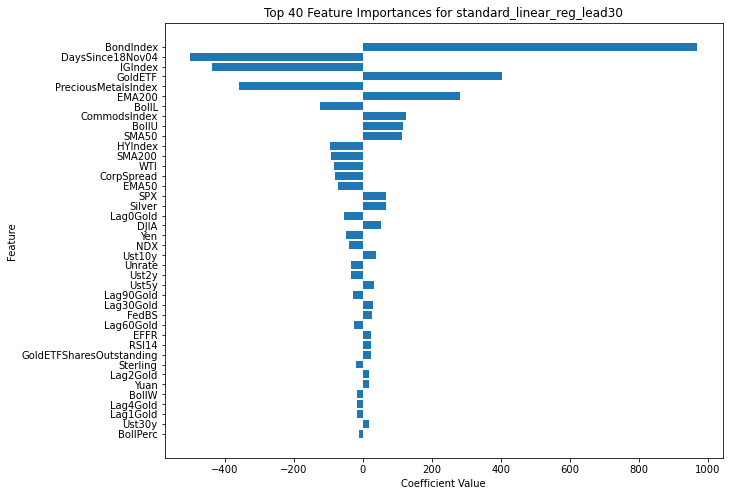

Index(['BondIndex', 'DaysSince18Nov04', 'IGIndex', 'GoldETF',
       'PreciousMetalsIndex', 'EMA200', 'BollL', 'CommodsIndex', 'BollU',
       'SMA50', 'HYIndex', 'SMA200', 'WTI', 'CorpSpread', 'EMA50', 'SPX',
       'Silver', 'Lag0Gold', 'DJIA', 'Yen', 'NDX', 'Ust10y', 'Unrate', 'Ust2y',
       'Ust5y', 'Lag90Gold', 'Lag30Gold', 'FedBS', 'Lag60Gold', 'EFFR',
       'RSI14', 'GoldETFSharesOutstanding', 'Sterling', 'Lag2Gold', 'Yuan',
       'BollW', 'Lag4Gold', 'Lag1Gold', 'Ust30y', 'BollPerc'],
      dtype='object')

In [26]:
show_feature_impt_plot(standard_model_results['standard_linear_reg_lead30'],X_train_lead30, "standard_linear_reg_lead30", 40)

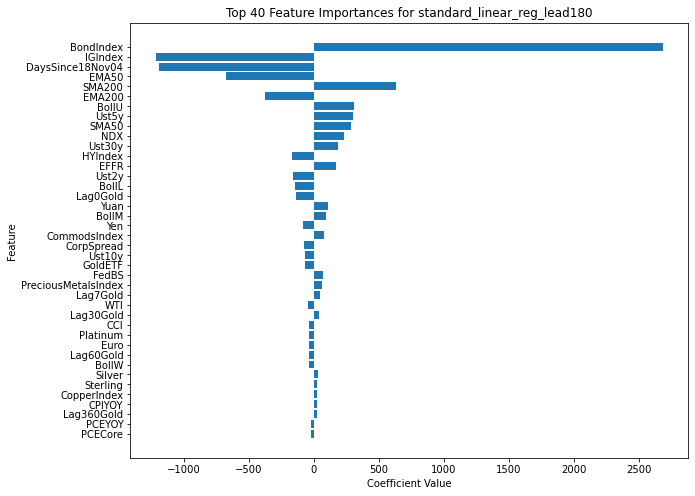

Index(['BondIndex', 'IGIndex', 'DaysSince18Nov04', 'EMA50', 'SMA200', 'EMA200',
       'BollU', 'Ust5y', 'SMA50', 'NDX', 'Ust30y', 'HYIndex', 'EFFR', 'Ust2y',
       'BollL', 'Lag0Gold', 'Yuan', 'BollM', 'Yen', 'CommodsIndex',
       'CorpSpread', 'Ust10y', 'GoldETF', 'FedBS', 'PreciousMetalsIndex',
       'Lag7Gold', 'WTI', 'Lag30Gold', 'CCI', 'Platinum', 'Euro', 'Lag60Gold',
       'BollW', 'Silver', 'Sterling', 'CopperIndex', 'CPIYOY', 'Lag360Gold',
       'PCEYOY', 'PCECore'],
      dtype='object')

In [27]:
show_feature_impt_plot(standard_model_results['standard_linear_reg_lead180'],X_train_lead180, "standard_linear_reg_lead180", 40)

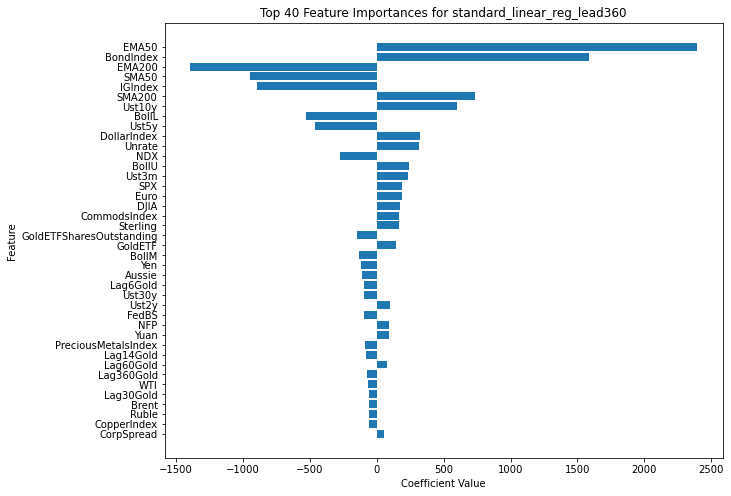

Index(['EMA50', 'BondIndex', 'EMA200', 'SMA50', 'IGIndex', 'SMA200', 'Ust10y',
       'BollL', 'Ust5y', 'DollarIndex', 'Unrate', 'NDX', 'BollU', 'Ust3m',
       'SPX', 'Euro', 'DJIA', 'CommodsIndex', 'Sterling',
       'GoldETFSharesOutstanding', 'GoldETF', 'BollM', 'Yen', 'Aussie',
       'Lag6Gold', 'Ust30y', 'Ust2y', 'FedBS', 'NFP', 'Yuan',
       'PreciousMetalsIndex', 'Lag14Gold', 'Lag60Gold', 'Lag360Gold', 'WTI',
       'Lag30Gold', 'Brent', 'Ruble', 'CopperIndex', 'CorpSpread'],
      dtype='object')

In [28]:
show_feature_impt_plot(standard_model_results['standard_linear_reg_lead360'],X_train_lead360, "standard_linear_reg_lead360", 40)

## Linear Regression with Regularisation

### Model 2: Linear Regression with Elastic Net Regularisation


In [25]:
## Tuning:
    
# ElasticNetCV automatically finds the best alpha and l1_ratio values
elastic_net_cv = ElasticNetCV(cv=10, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1])

# Fit the model
elastic_net_cv.fit(X_train_lead30, y_train_lead30)

# ElasticNet using the best parameters found by CV
elastic_net = ElasticNet(alpha=elastic_net_cv.alpha_, l1_ratio=elastic_net_cv.l1_ratio_, max_iter=3000)

elastic_net_model_results = train_models_on_all_data(datasets, elastic_net, "Elastic Net")

/Users/ezekielang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52111.91059484705, tolerance: 47817.00719991815
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezekielang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51851.125776447356, tolerance: 47290.89579618787
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezekielang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.122e+05, tolerance: 5.284e+04
  model = cd_fast.enet_coordinate_d

Fitting Elastic Net model for: lead7
Elastic Net Results for lead7 - MSE: 662.5832111379068, R^2: 0.9945102632150821, Adjusted R^2: 0.9942252217753558

Fitting Elastic Net model for: lead30


/Users/ezekielang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.261e+04, tolerance: 5.284e+04
  model = cd_fast.enet_coordinate_descent(


Elastic Net Results for lead30 - MSE: 1984.6373767472937, R^2: 0.9837611538401447, Adjusted R^2: 0.9829179906302772

Fitting Elastic Net model for: lead180


/Users/ezekielang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.239e+05, tolerance: 4.822e+04
  model = cd_fast.enet_coordinate_descent(


Elastic Net Results for lead180 - MSE: 2841.720086783633, R^2: 0.9746993825119826, Adjusted R^2: 0.9733857085204421

Fitting Elastic Net model for: lead360
Elastic Net Results for lead360 - MSE: 2796.44067508542, R^2: 0.9737012395260023, Adjusted R^2: 0.972335739349542



/Users/ezekielang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.787e+05, tolerance: 4.393e+04
  model = cd_fast.enet_coordinate_descent(


In [26]:
elastic_net_model_results

{'algorithm_name': 'Elastic Net',
 'lead7': {'MSE': 662.5832111379068,
  'R^2': 0.9945102632150821,
  'Adjusted R^2': 0.9942252217753558},
 'Elastic Net_lead7': ElasticNet(alpha=0.3473546392322341, l1_ratio=1.0, max_iter=3000),
 'lead30': {'MSE': 1984.6373767472937,
  'R^2': 0.9837611538401447,
  'Adjusted R^2': 0.9829179906302772},
 'Elastic Net_lead30': ElasticNet(alpha=0.3473546392322341, l1_ratio=1.0, max_iter=3000),
 'lead180': {'MSE': 2841.720086783633,
  'R^2': 0.9746993825119826,
  'Adjusted R^2': 0.9733857085204421},
 'Elastic Net_lead180': ElasticNet(alpha=0.3473546392322341, l1_ratio=1.0, max_iter=3000),
 'lead360': {'MSE': 2796.44067508542,
  'R^2': 0.9737012395260023,
  'Adjusted R^2': 0.972335739349542},
 'Elastic Net_lead360': ElasticNet(alpha=0.3473546392322341, l1_ratio=1.0, max_iter=3000)}

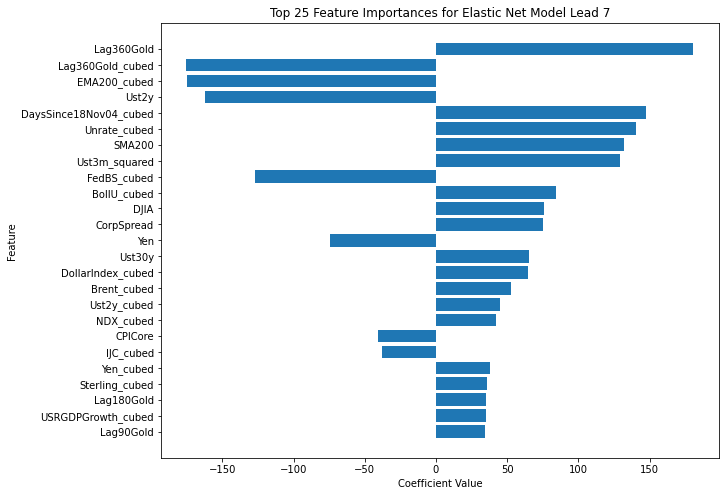

In [27]:
elastic_net_top_features = show_feature_impt_plot(elastic_net_model_results['Elastic Net_lead7'],X_train_lead7, "Elastic Net Model Lead 7", 25)

### Lasso Regression

In [28]:
# Initialize LassoCV: 5-fold cross-validation by default
lasso_cv = LassoCV(alphas=np.logspace(-5, 7, 13), # You can customize this alpha grid as needed
                   cv=10, # Number of cross-validation folds
                   random_state=0
                   ,max_iter=3000) # Ensures reproducibility

# Fit the LassoCV model to find the best alpha
lasso_cv.fit(X_train_lead30, y_train_lead30)

# Display the best alpha value found
print("Best alpha found by LassoCV:", lasso_cv.alpha_)
# ElasticNet using the best parameters found by CV
lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=6000)

lasso_results = train_models_on_all_data(datasets, lasso, "lasso")

/Users/ezekielang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295324.5715489397, tolerance: 47637.354488012475
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezekielang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1901993.2991487077, tolerance: 47637.354488012475
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezekielang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2192348.4232067936, tolerance: 47637.354488012475
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezekielang/opt/anaconda3/lib/py

Best alpha found by LassoCV: 1e-05
Fitting lasso model for: lead7


/Users/ezekielang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e+06, tolerance: 5.372e+04
  model = cd_fast.enet_coordinate_descent(


lasso Results for lead7 - MSE: 542.8872251452865, R^2: 0.9955019868903352, Adjusted R^2: 0.9952684383281876

Fitting lasso model for: lead30


/Users/ezekielang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.505e+06, tolerance: 5.284e+04
  model = cd_fast.enet_coordinate_descent(


lasso Results for lead30 - MSE: 1315.417651276371, R^2: 0.9892368927818721, Adjusted R^2: 0.988678044207235

Fitting lasso model for: lead180


/Users/ezekielang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+06, tolerance: 4.822e+04
  model = cd_fast.enet_coordinate_descent(


lasso Results for lead180 - MSE: 1610.468291916798, R^2: 0.9856615567381637, Adjusted R^2: 0.9849170673990725

Fitting lasso model for: lead360
lasso Results for lead360 - MSE: 1658.6013674291105, R^2: 0.9844019004327597, Adjusted R^2: 0.9835920064557195



/Users/ezekielang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.542e+06, tolerance: 4.393e+04
  model = cd_fast.enet_coordinate_descent(


In [29]:
lasso_results

{'algorithm_name': 'lasso',
 'lead7': {'MSE': 542.8872251452865,
  'R^2': 0.9955019868903352,
  'Adjusted R^2': 0.9952684383281876},
 'lasso_lead7': Lasso(alpha=1e-05, max_iter=6000),
 'lead30': {'MSE': 1315.417651276371,
  'R^2': 0.9892368927818721,
  'Adjusted R^2': 0.988678044207235},
 'lasso_lead30': Lasso(alpha=1e-05, max_iter=6000),
 'lead180': {'MSE': 1610.468291916798,
  'R^2': 0.9856615567381637,
  'Adjusted R^2': 0.9849170673990725},
 'lasso_lead180': Lasso(alpha=1e-05, max_iter=6000),
 'lead360': {'MSE': 1658.6013674291105,
  'R^2': 0.9844019004327597,
  'Adjusted R^2': 0.9835920064557195},
 'lasso_lead360': Lasso(alpha=1e-05, max_iter=6000)}

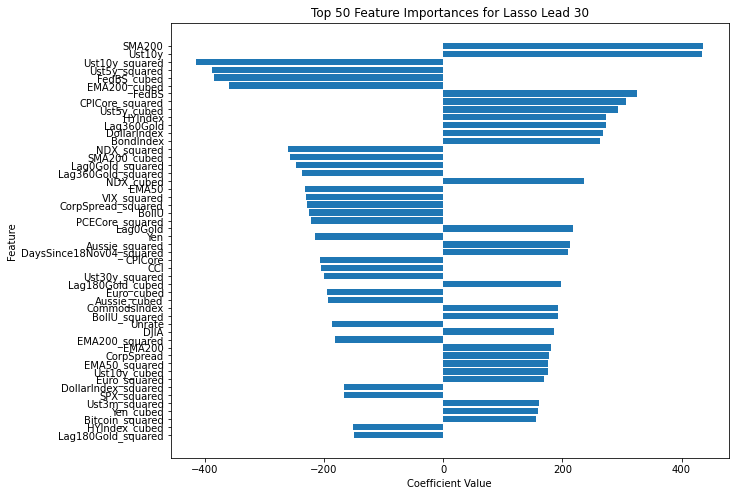

Index(['SMA200', 'Ust10y', 'Ust10y_squared', 'Ust5y_squared', 'FedBS_cubed',
       'EMA200_cubed', 'FedBS', 'CPICore_squared', 'Ust5y_cubed', 'HYIndex',
       'Lag360Gold', 'DollarIndex', 'BondIndex', 'NDX_squared', 'SMA200_cubed',
       'Lag0Gold_squared', 'Lag360Gold_squared', 'NDX_cubed', 'EMA50',
       'VIX_squared', 'CorpSpread_squared', 'BollU', 'PCECore_squared',
       'Lag0Gold', 'Yen', 'Aussie_squared', 'DaysSince18Nov04_squared',
       'CPICore', 'CCI', 'Ust30y_squared', 'Lag180Gold_cubed', 'Euro_cubed',
       'Aussie_cubed', 'CommodsIndex', 'BollU_squared', 'Unrate', 'DJIA',
       'EMA200_squared', 'EMA200', 'CorpSpread', 'EMA50_squared',
       'Ust10y_cubed', 'Euro_squared', 'DollarIndex_squared', 'SPX_squared',
       'Ust3m_squared', 'Yen_cubed', 'Bitcoin_squared', 'HYIndex_cubed',
       'Lag180Gold_squared'],
      dtype='object')

In [30]:
show_feature_impt_plot(lasso_results['lasso_lead30'], X_train_lead30, "Lasso Lead 30", 50)

## Ridge Regression


In [31]:
# Initialize RidgeCV: 5-fold cross-validation by default
ridge_cv = RidgeCV(alphas=np.logspace(-5, 7, 13),  # You can customize this alpha grid as needed
                   cv=10,  # Number of cross-validation folds
                   scoring='neg_mean_squared_error')  # Specifies the score type for CV

# Fit the RidgeCV model to find the best alpha
ridge_cv.fit(X_train_lead7, y_train_lead7)

# Display the best alpha value found
print("Best alpha found by RidgeCV:", ridge_cv.alpha_)

# Ridge using the best parameters found by CV
ridge = Ridge(alpha=ridge_cv.alpha_, max_iter=3000)

# Assuming a function to train models on all data and calculate results
ridge_results = train_models_on_all_data(datasets, ridge, "ridge")

Best alpha found by RidgeCV: 1e-05
Fitting ridge model for: lead7
ridge Results for lead7 - MSE: 514.2347636072097, R^2: 0.995739382691255, Adjusted R^2: 0.9955181603377271

Fitting ridge model for: lead30
ridge Results for lead30 - MSE: 1048.5389216687352, R^2: 0.9914205675852454, Adjusted R^2: 0.9909751010968967

Fitting ridge model for: lead180
ridge Results for lead180 - MSE: 1098.1951980205997, R^2: 0.9902224653436065, Adjusted R^2: 0.9897147902647048

Fitting ridge model for: lead360
ridge Results for lead360 - MSE: 1083.6461713470756, R^2: 0.9898089913536424, Adjusted R^2: 0.9892798476276988



In [32]:
ridge_results

{'algorithm_name': 'ridge',
 'lead7': {'MSE': 514.2347636072097,
  'R^2': 0.995739382691255,
  'Adjusted R^2': 0.9955181603377271},
 'ridge_lead7': Ridge(alpha=1e-05, max_iter=3000),
 'lead30': {'MSE': 1048.5389216687352,
  'R^2': 0.9914205675852454,
  'Adjusted R^2': 0.9909751010968967},
 'ridge_lead30': Ridge(alpha=1e-05, max_iter=3000),
 'lead180': {'MSE': 1098.1951980205997,
  'R^2': 0.9902224653436065,
  'Adjusted R^2': 0.9897147902647048},
 'ridge_lead180': Ridge(alpha=1e-05, max_iter=3000),
 'lead360': {'MSE': 1083.6461713470756,
  'R^2': 0.9898089913536424,
  'Adjusted R^2': 0.9892798476276988},
 'ridge_lead360': Ridge(alpha=1e-05, max_iter=3000)}

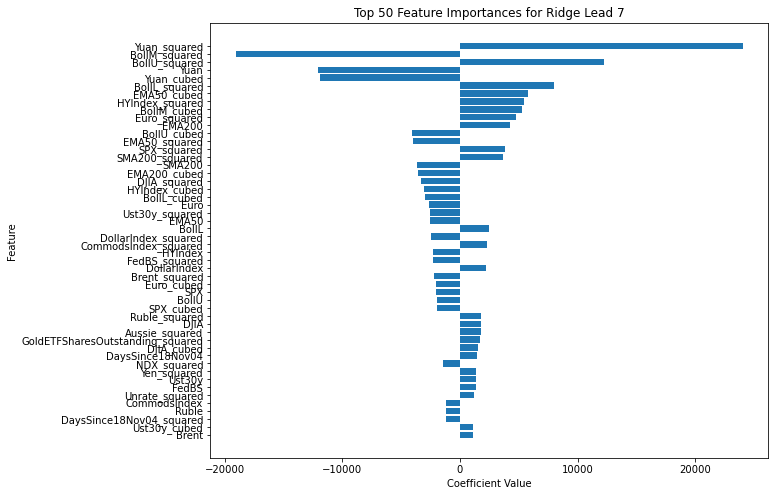

Index(['Yuan_squared', 'BollM_squared', 'BollU_squared', 'Yuan', 'Yuan_cubed',
       'BollL_squared', 'EMA50_cubed', 'HYIndex_squared', 'BollM_cubed',
       'Euro_squared', 'EMA200', 'BollU_cubed', 'EMA50_squared', 'SPX_squared',
       'SMA200_squared', 'SMA200', 'EMA200_cubed', 'DJIA_squared',
       'HYIndex_cubed', 'BollL_cubed', 'Euro', 'Ust30y_squared', 'EMA50',
       'BollL', 'DollarIndex_squared', 'CommodsIndex_squared', 'HYIndex',
       'FedBS_squared', 'DollarIndex', 'Brent_squared', 'Euro_cubed', 'SPX',
       'BollU', 'SPX_cubed', 'Ruble_squared', 'DJIA', 'Aussie_squared',
       'GoldETFSharesOutstanding_squared', 'DJIA_cubed', 'DaysSince18Nov04',
       'NDX_squared', 'Yen_squared', 'Ust30y', 'FedBS', 'Unrate_squared',
       'CommodsIndex', 'Ruble', 'DaysSince18Nov04_squared', 'Ust30y_cubed',
       'Brent'],
      dtype='object')

In [33]:
show_feature_impt_plot(ridge_results['ridge_lead7'], X_train_lead7, "Ridge Lead 7", 50)

## Stepwise Selection Models

In [117]:
def getStepwiseKFeatures(k, direction, X_train, y_train, X_test, y_test):
    # Initialize the linear regression model
    linmod = LinearRegression()
    
    # Initialize the forward or backward feature selector with the specified number of features
    sfs = SequentialFeatureSelector(linmod, n_features_to_select=k, direction=direction)
    sfs.fit(X_train, y_train)
    
    # Get the boolean mask of the selected features
    selected_features = sfs.get_support()
    
    # Subset the training and test data to the selected features
    current_X_train = X_train.iloc[:, selected_features]
    current_X_test = X_test.iloc[:, selected_features]
    
    # Fit the linear model on the selected features
    linmod.fit(current_X_train, y_train)
    
    # Make predictions on the test set
    y_pred = linmod.predict(current_X_test)
    
    # Compute metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate the number of observations and predictors for adjusted R^2
    n = current_X_train.shape[0]  # number of observations
    p = current_X_train.shape[1]  # number of predictors
    
    # Calculate adjusted R-squared
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    # Return the results, including adjusted R^2
    return {
        "model": linmod,
        "R2": r2,
        "Adjusted R2": adjusted_r2,
        "MSE": mse,
        "MAE": mae,
        "N_features": k,
        "Selected_features": selected_features
    }


### Model 2: Stepwise Feature Selection (Forward Propogation)

In [118]:
forward_model_lead7 = getStepwiseKFeatures(30, 'forward', X_train_lead7, y_train_lead7, X_test_lead7, y_test_lead7)

KeyboardInterrupt: 

In [36]:
forward_model_lead30 = getStepwiseKFeatures(30, 'forward', X_train_lead30, y_train_lead30, X_test_lead30, y_test_lead30)

In [37]:
forward_model_lead180 = getStepwiseKFeatures(30, 'forward', X_train_lead180, y_train_lead180, X_test_lead180, y_test_lead180)

In [38]:
forward_model_lead360 = getStepwiseKFeatures(30, 'forward', X_train_lead360, y_train_lead360, X_test_lead360, y_test_lead360)

## Evaluating Models on Evaluation Set

Models:
- Lasso (7,30,180,360)
- Ridge (7,30,180,360)
- ElasticNet (7,30,180,360)
- forward_model_lead7
- forward_model_lead30
- forward_model_lead180
- forward_model_lead360


In [39]:
lasso_lead_7_model = lasso_results['lasso_lead7']
lasso_lead_30_model = lasso_results['lasso_lead30']
lasso_lead_180_model = lasso_results['lasso_lead180']
lasso_lead_360_model = lasso_results['lasso_lead360']

In [40]:
ridge_lead_7_model = ridge_results['ridge_lead7']
ridge_lead_30_model = ridge_results['ridge_lead30']
ridge_lead_180_model = ridge_results['ridge_lead180']
ridge_lead_360_model = ridge_results['ridge_lead360']

In [41]:
elastic_net_lead_7_model = elastic_net_model_results['Elastic Net_lead7']
elastic_net_lead_30_model = elastic_net_model_results['Elastic Net_lead30']
elastic_net_lead_180_model = elastic_net_model_results['Elastic Net_lead180']
elastic_net_lead_360_model = elastic_net_model_results['Elastic Net_lead360']

In [42]:
for_mod_lead7 = forward_model_lead7['model']
for_mod_lead30 = forward_model_lead30['model']
for_mod_lead180 = forward_model_lead180['model']
for_mod_lead360 = forward_model_lead360['model']


In [43]:
evaluation_X_scaled

,Lag0Gold,Lag1Gold,Lag2Gold,Lag3Gold,Lag4Gold,Lag5Gold,Lag6Gold,Lag7Gold,Lag14Gold,Lag30Gold,...,BollM_squared,BollM_cubed,BollL_squared,BollL_cubed,BollW_squared,BollW_cubed,BollPerc_squared,BollPerc_cubed,DaysSince18Nov04_squared,DaysSince18Nov04_cubed
0,-2.342917,-2.337728,-2.585561,-2.429316,-2.435208,-2.478414,-2.462343,-2.456081,-2.276817,-2.345114,...,-2.362072,-2.234230,-2.232521,-2.125541,-0.687150,-0.498963,1.593530,1.612968,-1.666053,-1.603238
1,-2.342917,-2.337728,-2.331815,-2.579815,-2.423256,-2.428862,-2.472096,-2.456081,-2.276817,-2.527767,...,-2.362072,-2.234230,-2.232521,-2.125541,-0.687150,-0.498963,1.593530,1.612968,-1.663761,-1.601208
2,-2.171958,-2.337728,-2.331815,-2.326324,-2.573566,-2.416926,-2.422609,-2.465821,-2.362302,-2.527767,...,-2.342248,-2.217860,-2.252699,-2.142396,-0.550463,-0.447623,2.944946,3.658671,-1.661468,-1.599177
3,-2.171958,-2.166926,-2.331815,-2.326324,-2.320393,-2.567030,-2.410689,-2.416400,-2.378040,-2.527767,...,-2.319768,-2.199250,-2.246420,-2.137155,-0.485613,-0.419398,2.227096,2.520857,-1.659175,-1.597145
4,-1.875143,-2.166926,-2.161199,-2.326324,-2.320393,-2.314203,-2.560593,-2.404496,-2.368025,-2.448096,...,-2.289861,-2.174418,-2.307500,-2.187977,-0.033062,-0.167738,3.456726,4.534856,-1.656882,-1.595113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1.570597,1.572182,1.573848,1.474591,1.469948,1.455407,1.336549,1.680846,1.460201,0.620827,...,1.264971,1.318824,0.831425,0.839979,1.665491,1.357068,0.421119,0.209660,1.782591,1.845604
1339,1.596786,1.572182,1.573848,1.575407,1.475743,1.470960,1.456472,1.337786,1.512064,0.620827,...,1.320445,1.381033,0.909107,0.924753,1.524482,1.203067,0.388122,0.176130,1.785454,1.848771
1340,1.788115,1.598348,1.573848,1.575407,1.576433,1.476747,1.472004,1.457550,1.391527,0.620827,...,1.396395,1.466556,1.034540,1.062557,1.243179,0.909075,0.811643,0.633006,1.788317,1.851940
1341,1.942706,1.789500,1.599985,1.575407,1.576433,1.577299,1.477784,1.473062,1.368993,0.675797,...,1.485872,1.567828,1.204076,1.250610,0.841473,0.521764,1.255367,1.168872,1.791181,1.855110


In [44]:
evaluation_y_lead7

5373     1497.7
5374     1497.7
5375     1504.7
5376     1498.4
5377    1513.25
         ...   
6711     2001.9
6712     2001.9
6713     2002.7
6714     2008.2
6715    2048.45
Name: Lead7Gold, Length: 1343, dtype: object

In [151]:
final_dataset = {
  'lead7' : (evaluation_X_scaled, evaluation_y_lead7),
  'lead30' : (evaluation_X_scaled, evaluation_y_lead30),
  'lead180' : (evaluation_X_scaled, evaluation_y_lead180),
  'lead360' : (evaluation_X_scaled, evaluation_y_lead360),
}

def final_pred(dataset, target_model):
  X_final = dataset[0]
  y_test = dataset[1]
  y_pred = target_model.predict(X_final)

  # Calculate metrics
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  
  # Calculate the number of observations and predictors
  n = X_final.shape[0]  # number of observations
  p = X_final.shape[1]  # number of predictors

  # Calculate adjusted R-squared
  adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
  
  # Store results
  return {'MSE': mse, 'R^2': r2, 'Adjusted R^2': adjusted_r2, 'y_predictions' : y_pred}


In [46]:
final_pred(final_dataset['lead7'], lasso_lead_7_model)

{'MSE': 360522.10890519887,
 'R^2': -18.2170218501698,
 'Adjusted R^2': -21.822339223829974,
 'y_predictions': array([ 936.11371399,  946.11353718, 1000.22139151, ..., 1425.11564356,
        1451.57266346, 1434.49424778])}

In [47]:
final_pred(final_dataset['lead30'], lasso_lead_30_model)

{'MSE': 364329.02674709744,
 'R^2': -18.701495880205645,
 'Adjusted R^2': -22.3977057267575,
 'y_predictions': array([ 936.11371399,  946.11353718, 1000.22139151, ..., 1425.11564356,
        1451.57266346, 1434.49424778])}

In [48]:
final_pred(final_dataset['lead180'], lasso_lead_180_model)

{'MSE': 405673.03543839086,
 'R^2': -36.683455467763714,
 'Adjusted R^2': -43.75327189180434,
 'y_predictions': array([ 936.11371399,  946.11353718, 1000.22139151, ..., 1425.11564356,
        1451.57266346, 1434.49424778])}

In [49]:
final_pred(final_dataset['lead360'], lasso_lead_360_model)

{'MSE': 473621.88860919746,
 'R^2': -39.89138925554326,
 'Adjusted R^2': -47.56304812472482,
 'y_predictions': array([ 936.11371399,  946.11353718, 1000.22139151, ..., 1425.11564356,
        1451.57266346, 1434.49424778])}

In [50]:
final_pred(final_dataset['lead7'], ridge_lead_7_model)

{'MSE': 723113.6570947696,
 'R^2': -37.54435166471422,
 'Adjusted R^2': -44.77568135756326,
 'y_predictions': array([1685.31688875, 1673.78002603, 1626.40794139, ..., 1422.38843752,
        1522.71519186, 1628.43211867])}

In [51]:
final_pred(final_dataset['lead30'], ridge_lead_30_model)

{'MSE': 718603.0213776618,
 'R^2': -37.85925475546294,
 'Adjusted R^2': -45.14966361224006,
 'y_predictions': array([1685.31688875, 1673.78002603, 1626.40794139, ..., 1422.38843752,
        1522.71519186, 1628.43211867])}

In [52]:
final_pred(final_dataset['lead180'], ridge_lead_180_model)

{'MSE': 696781.2438823453,
 'R^2': -63.72484656575358,
 'Adjusted R^2': -75.86791512499231,
 'y_predictions': array([1685.31688875, 1673.78002603, 1626.40794139, ..., 1422.38843752,
        1522.71519186, 1628.43211867])}

In [53]:
final_pred(final_dataset['lead360'], ridge_lead_360_model)

{'MSE': 716742.8921659768,
 'R^2': -60.88187941602171,
 'Adjusted R^2': -72.49157714716915,
 'y_predictions': array([1685.31688875, 1673.78002603, 1626.40794139, ..., 1422.38843752,
        1522.71519186, 1628.43211867])}

In [54]:
# Input Test Data for Lead 7 Forward Selected
final_x_lead7 = final_dataset['lead7'][0][for_mod_lead7.feature_names_in_]

# Y predictions
y_pred_for_7 = for_mod_lead7.predict(final_x_lead7)

y_test_for_7 = final_dataset['lead7'][1]
# Calculate metrics
mse = mean_squared_error(y_test_for_7, y_pred_for_7)
r2 = r2_score(y_test_for_7, y_pred_for_7)
print(mse,r2)

449127.77031001524 -22.939996916625013


In [55]:
# Input Test Data for Lead 30 Forward Selected
final_x_lead30 = final_dataset['lead30'][0][for_mod_lead30.feature_names_in_]

# Y predictions
y_pred_for_30 = for_mod_lead30.predict(final_x_lead30)
y_test_for_30 = final_dataset['lead30'][1]

# Calculate metrics
mse = mean_squared_error(y_test_for_30, y_pred_for_30)
r2 = r2_score(y_test_for_30, y_pred_for_30)
print(mse,r2)

858616.290485229 -45.43062744878304


In [56]:
# Input Test Data for Lead 180 Forward Selected
final_x_lead180 = final_dataset['lead180'][0][for_mod_lead180.feature_names_in_]

# Y predictions
y_pred_for_180 = for_mod_lead180.predict(final_x_lead180)
y_test_for_180 = final_dataset['lead180'][1]

# Calculate metrics
mse = mean_squared_error(y_test_for_180, y_pred_for_180)
r2 = r2_score(y_test_for_180, y_pred_for_180)
print(mse,r2)

797979.5702335483 -73.12528063785481


In [57]:
# Input Test Data for Lead 30 Forward Selected
final_x_lead360 = final_dataset['lead360'][0][for_mod_lead360.feature_names_in_]

# Y predictions
y_pred_for_360 = for_mod_lead360.predict(final_x_lead360)
y_test_for_360 = final_dataset['lead360'][1]

# Calculate metrics
mse = mean_squared_error(y_test_for_360, y_pred_for_360)
r2 = r2_score(y_test_for_360, y_pred_for_360)
print(mse,r2)

620844.6053980296 -52.60224904529882
